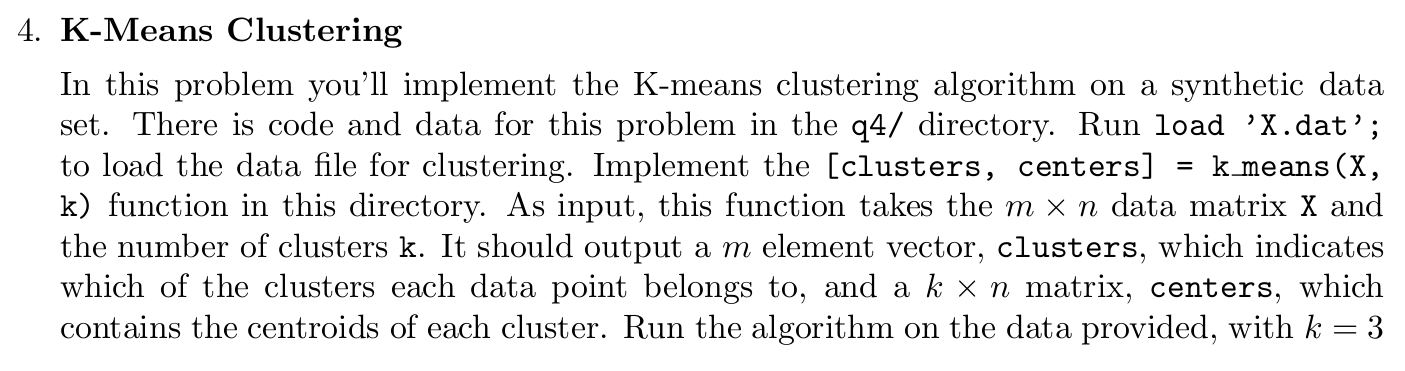

---
```
function [clusters, centroids] = k_means(X, k)

%%% YOUR CODE HERE
```
---

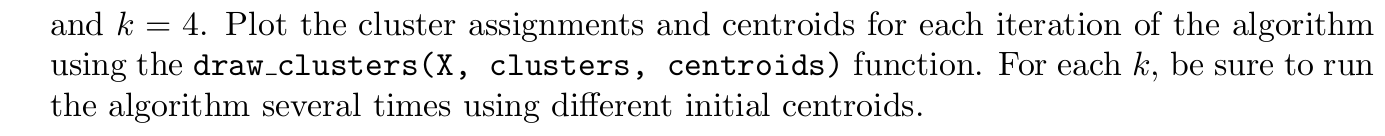

# Solution

In [133]:
import numpy as np

In [134]:
X = np.loadtxt('./data/PS3-data/q4/X.dat')
print(X.shape)

(5000, 2)


### Visualize the data

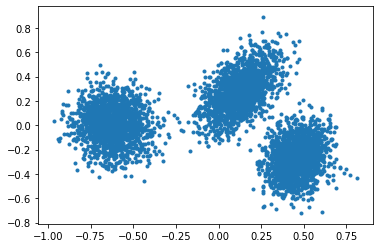

In [135]:
import matplotlib.pyplot as plt

plt.scatter(X[:,0], X[:,1], marker='.')
plt.show()

K-means algorithm:

> **Repeat**
>
> 1. **Initialize k centroids** at random
>
> 2. **Assign points** to closest centroids
>
> 3. **Update centroids** as **mean of each class**

In [136]:
def norm2(X, c):
    return np.sqrt(np.sum((X-c)**2, axis=1))

def distances(X, centroids):
    distances = np.asarray([norm2(X,c) for c in centroids])
    return distances



In [171]:
def k_means(X, k=3):
    m = X.shape[0] # m examples
    n = X.shape[1] # n dimensions
    
    
    # Initialize k centroids of n dimensions at random (from population)
    last_centroids = np.zeros((k, n))
    points_ids = np.arange(0, m)
    centroids_ids = np.random.choice(points_ids, size=k, replace=False)
    centroids = X[centroids_ids,:]
    i=0
    print("Iteration: ", end="")
    while np.sqrt(np.sum((last_centroids - centroids)**2)) > 1e-15 and 1e4:
        print(i, end=" ")
        last_centroids = centroids.copy()
        # Assign points to closest centroids
        # closest: m x 1 dimensional
        #          with values {0,1,2,...,k}
        #          corresponding to closest centroid
        clusters = np.argmin(distances(X, centroids), axis=0)
        # Update centroids as mean of each class
        for c in range(k):
            #print(np.mean(X[clusters==c], axis=0))
            centroids[c,:] = np.mean(X[clusters==c], axis=0)
        i+=1
    print('')
    return np.asarray([clusters, centroids])

clusters, centroids = k_means(X)

Iteration: 0 1 2 3 4 


Let's plot those centroid coordinates

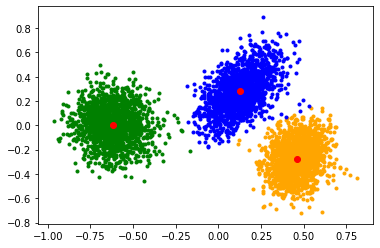

In [172]:
def plot_clusters(X, clusters, centroids):
    col = ['orange','g','b','k']
    k = centroids.shape[0]
    for c in range(k):
        plt.scatter(X[clusters==c][:,0], X[clusters==c][:,1], marker='.', color=col[c%4])
    #plt.scatter(X[clusters==1][:,0], X[clusters==1][:,1], marker='.', color='g')
    #plt.scatter(X[clusters==2][:,0], X[clusters==2][:,1], marker='.', color='b')
    plt.plot(centroids[:,0],centroids[:,1], 'bo', color='red')

    plt.show()
    
plot_clusters(X, clusters, centroids)

* Try `CTRL+Enter` to run several times the next cell to visualize posible configurations (for an absurd problem):

Iteration: 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 


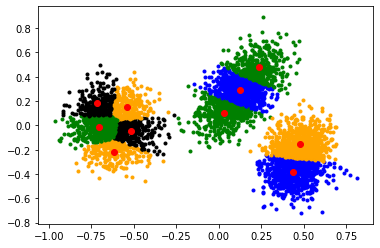

In [192]:
clusters, centroids = k_means(X, k=10)
plot_clusters(X, clusters, centroids)

## Plot for each update

Initial state


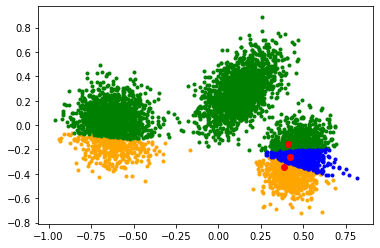

Iteration: 0


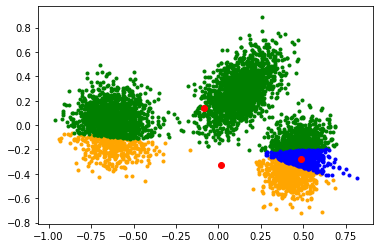

Iteration: 1


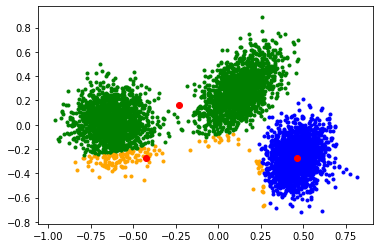

Iteration: 2


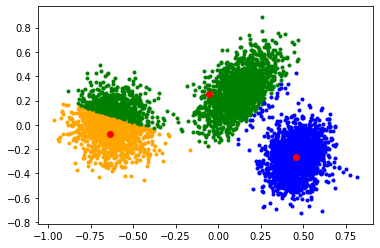

Iteration: 3


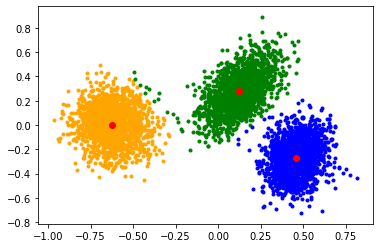

Iteration: 4


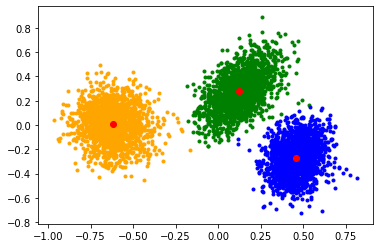

Iteration: 5


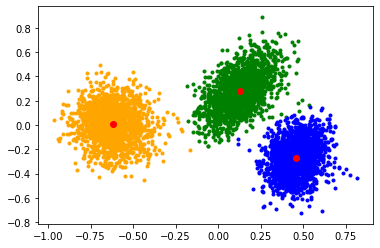

Iteration: 6


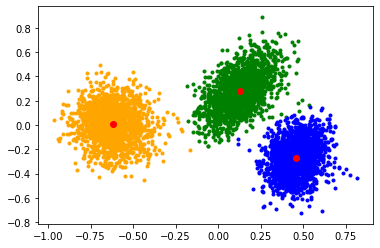

In [193]:
def k_means_plot(X, k=3):
    m = X.shape[0] # m examples
    n = X.shape[1] # n dimensions

    # Initialize k centroids of n dimensions at random (from population)
    last_centroids = np.zeros((k, n))
    #centroids = np.random.uniform(-1, 1, (k, n))
    points_ids = np.arange(0, m)
    centroids_ids = np.random.choice(points_ids, size=k, replace=False)
    centroids = X[centroids_ids,:]
    i=0
    # Plot initial state
    print("Initial state")
    clusters = np.argmin(distances(X, centroids), axis=0)
    plot_clusters(X, clusters, centroids)
    while np.sqrt(np.sum((last_centroids - centroids)**2)) > 1e-15 and 1e4:
        last_centroids = centroids.copy()
        # Assign points to closest centroids
        # closest: m x 1 dimensional
        #          with values {0,1,2,...,k}
        #          corresponding to closest centroid
        clusters = np.argmin(distances(X, centroids), axis=0)
        # Update centroids as mean of each class
        for c in range(k):
            #print(np.mean(X[clusters==c], axis=0))
            centroids[c,:] = np.mean(X[clusters==c], axis=0)
        # Plot after each update
        print("Iteration:", i)
        plot_clusters(X, clusters, centroids)
        i+=1
    
    return np.asarray([clusters, centroids])

clusters, centroids = k_means_plot(X)

Initial state


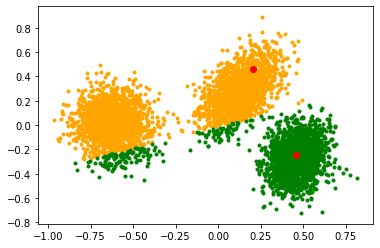

Iteration: 0


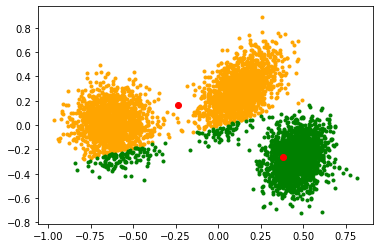

Iteration: 1


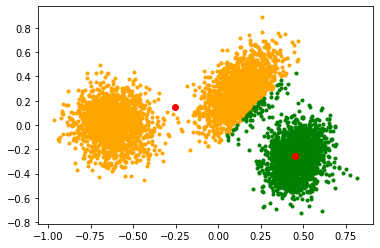

Iteration: 2


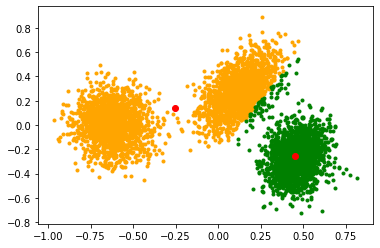

Iteration: 3


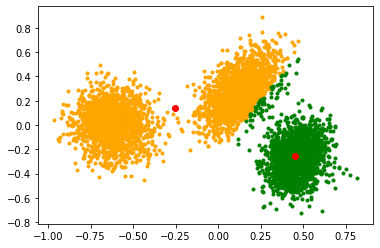

Iteration: 4


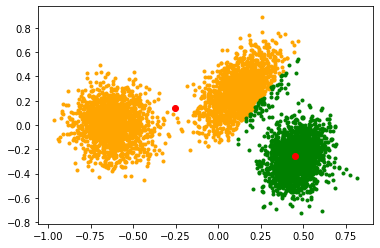

Iteration: 5


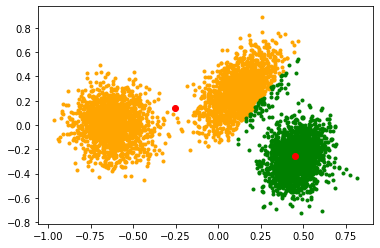

In [194]:
clusters, centroids = k_means_plot(X, k=2)

Initial state


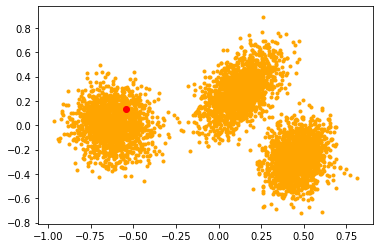

Iteration: 0


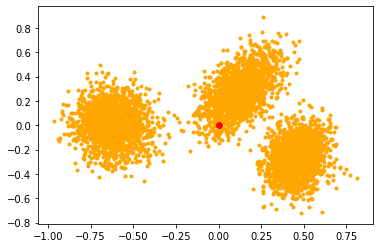

Iteration: 1


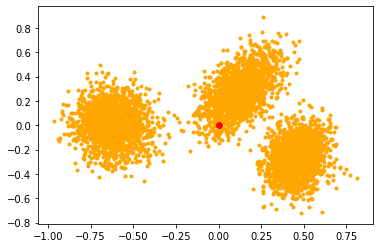

In [195]:
clusters, centroids = k_means_plot(X, k=1)

That's the mean of the data on each dimension.

# K-medians

Initial state


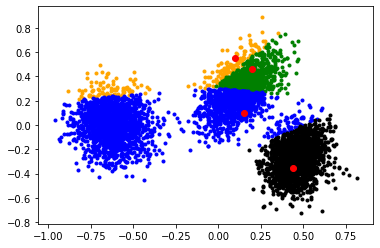

Iteration: 0


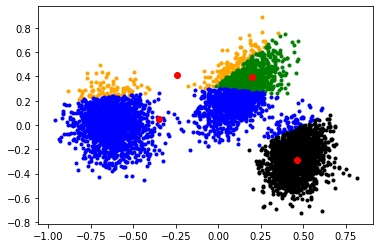

Iteration: 1


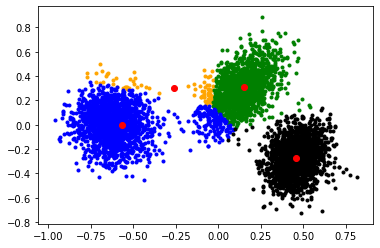

Iteration: 2


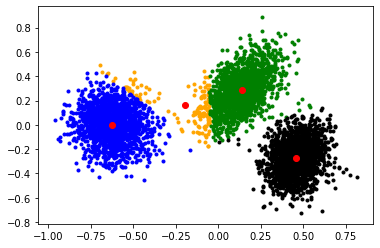

Iteration: 3


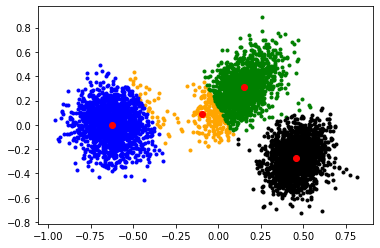

Iteration: 4


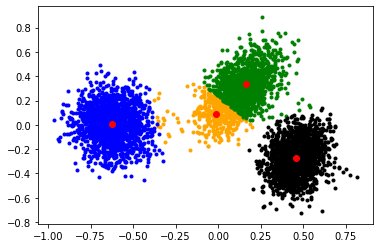

Iteration: 5


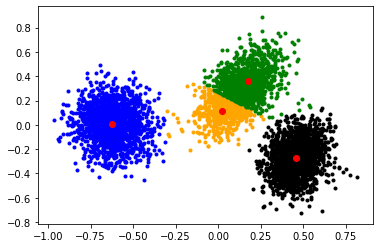

Iteration: 6


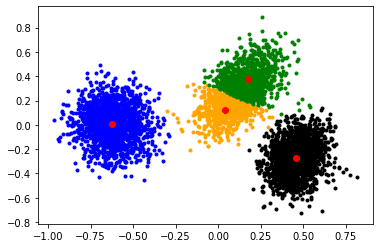

Iteration: 7


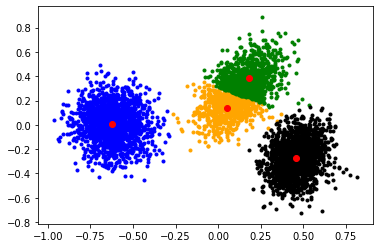

Iteration: 8


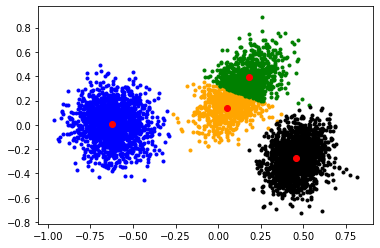

Iteration: 9


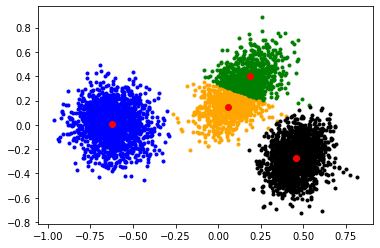

Iteration: 10


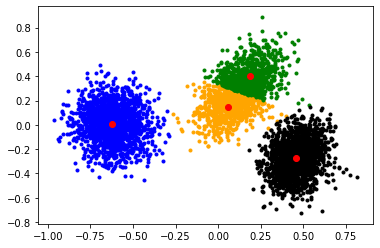

Iteration: 11


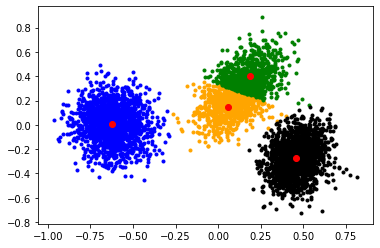

Iteration: 12


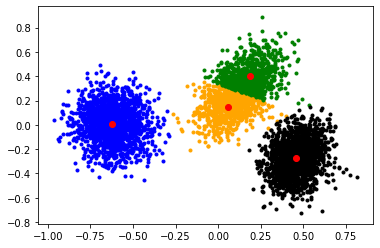

Iteration: 13


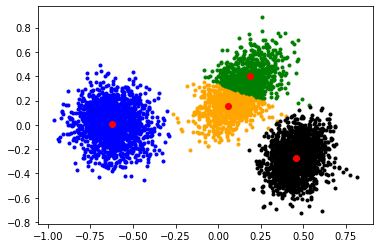

Iteration: 14


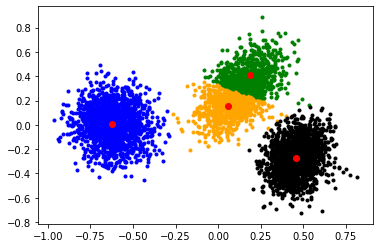

Iteration: 15


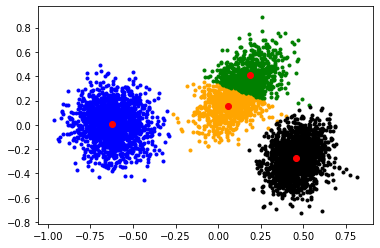

Iteration: 16


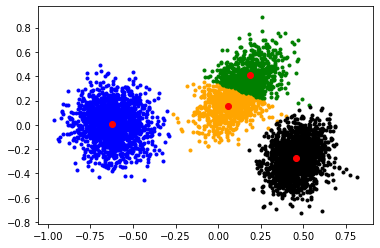

Iteration: 17


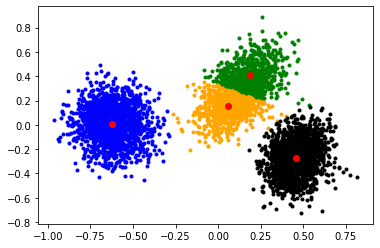

Iteration: 18


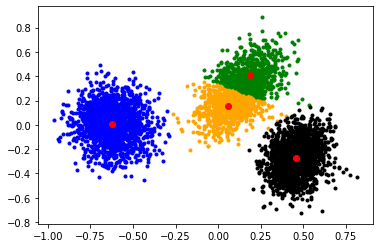

Iteration: 19


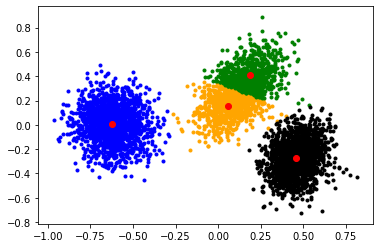

Iteration: 20


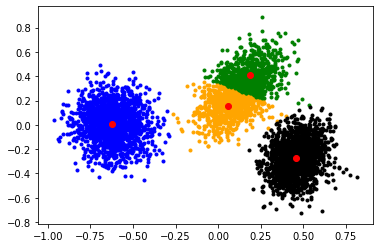

Iteration: 21


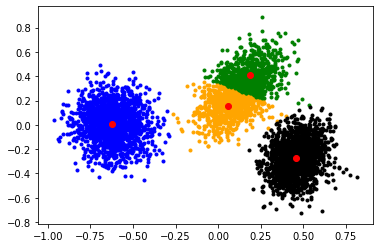

In [202]:
def k_medians_plot(X, k=3):
    m = X.shape[0] # m examples
    n = X.shape[1] # n dimensions

    # Initialize k centroids of n dimensions at random (from population)
    last_centroids = np.zeros((k, n))
    #centroids = np.random.uniform(-1, 1, (k, n))
    points_ids = np.arange(0, m)
    centroids_ids = np.random.choice(points_ids, size=k, replace=False)
    centroids = X[centroids_ids,:]
    i=0
    # Plot initial state
    print("Initial state")
    clusters = np.argmin(distances(X, centroids), axis=0)
    plot_clusters(X, clusters, centroids)
    while np.sqrt(np.sum((last_centroids - centroids)**2)) > 1e-15 and 1e4:
        last_centroids = centroids.copy()
        # Assign points to closest centroids
        # closest: m x 1 dimensional
        #          with values {0,1,2,...,k}
        #          corresponding to closest centroid
        clusters = np.argmin(distances(X, centroids), axis=0)
        # Update centroids as mean of each class
        for c in range(k):
            #print(np.mean(X[clusters==c], axis=0))
            centroids[c,:] = np.median(X[clusters==c], axis=0)
        # Plot after each update
        print("Iteration:", i)
        plot_clusters(X, clusters, centroids)
        i+=1
    
    return np.asarray([clusters, centroids])

clusters, centroids = k_means_plot(X, k=4)

# K-max

(it does not work)

Initial state


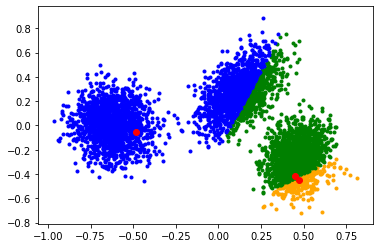

Iteration: 0


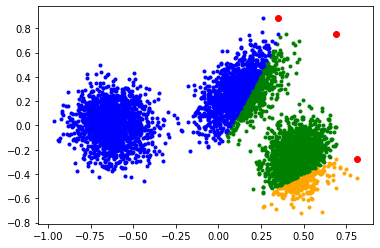

Iteration: 1


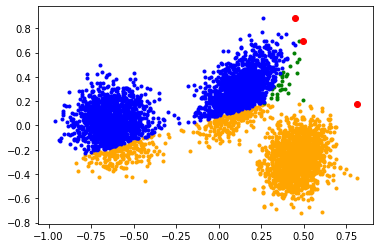

Iteration: 2


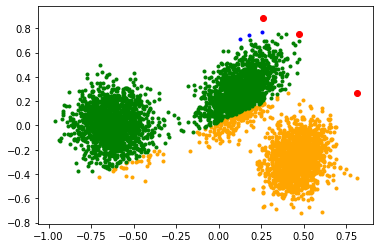

Iteration: 3


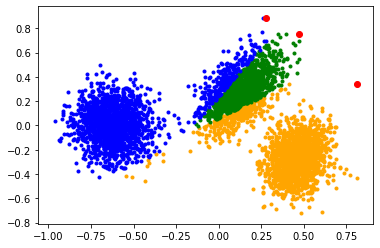

Iteration: 4


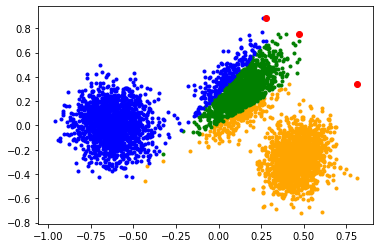

In [213]:
def k_max_plot(X, k=3):
    m = X.shape[0] # m examples
    n = X.shape[1] # n dimensions

    # Initialize k centroids of n dimensions at random (from population)
    last_centroids = np.zeros((k, n))
    #centroids = np.random.uniform(-1, 1, (k, n))
    points_ids = np.arange(0, m)
    centroids_ids = np.random.choice(points_ids, size=k, replace=False)
    centroids = X[centroids_ids,:]
    i=0
    # Plot initial state
    print("Initial state")
    clusters = np.argmin(distances(X, centroids), axis=0)
    plot_clusters(X, clusters, centroids)
    while np.sqrt(np.sum((last_centroids - centroids)**2)) > 1e-15 and 1e4:
        last_centroids = centroids.copy()
        # Assign points to closest centroids
        # closest: m x 1 dimensional
        #          with values {0,1,2,...,k}
        #          corresponding to closest centroid
        clusters = np.argmin(distances(X, centroids), axis=0)
        # Update centroids as mean of each class
        for c in range(k):
            #print(np.mean(X[clusters==c], axis=0))
            centroids[c,:] = np.max(X[clusters==c], axis=0)
        # Plot after each update
        print("Iteration:", i)
        plot_clusters(X, clusters, centroids)
        i+=1
    
    return np.asarray([clusters, centroids])

clusters, centroids = k_max_plot(X, k=3)

Initial state


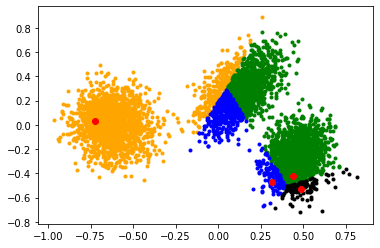

Iteration: 0


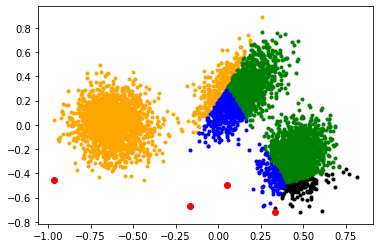

Iteration: 1


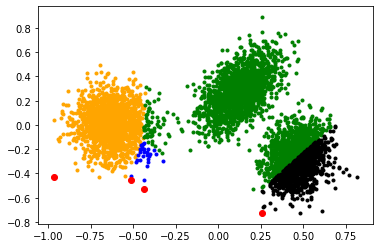

Iteration: 2


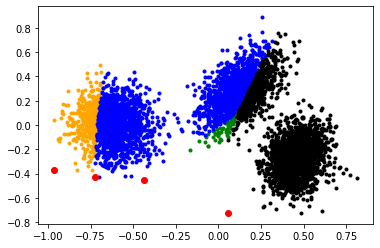

Iteration: 3


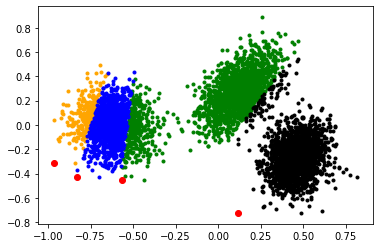

Iteration: 4


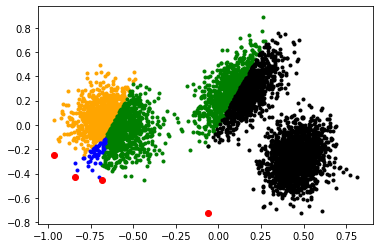

Iteration: 5


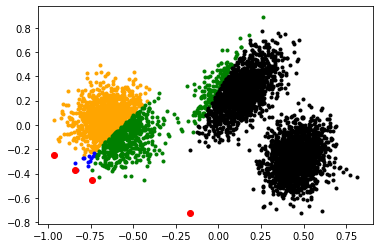

Iteration: 6


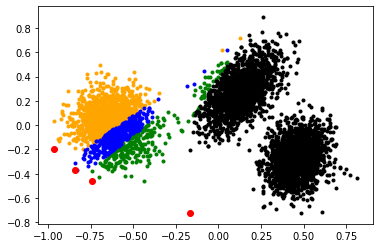

Iteration: 7


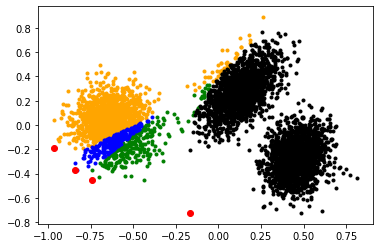

In [210]:
def k_min_plot(X, k=3):
    m = X.shape[0] # m examples
    n = X.shape[1] # n dimensions

    # Initialize k centroids of n dimensions at random (from population)
    last_centroids = np.zeros((k, n))
    #centroids = np.random.uniform(-1, 1, (k, n))
    points_ids = np.arange(0, m)
    centroids_ids = np.random.choice(points_ids, size=k, replace=False)
    centroids = X[centroids_ids,:]
    i=0
    # Plot initial state
    print("Initial state")
    clusters = np.argmin(distances(X, centroids), axis=0)
    plot_clusters(X, clusters, centroids)
    while np.sqrt(np.sum((last_centroids - centroids)**2)) > 1e-15 and 1e4:
        last_centroids = centroids.copy()
        # Assign points to closest centroids
        # closest: m x 1 dimensional
        #          with values {0,1,2,...,k}
        #          corresponding to closest centroid
        clusters = np.argmin(distances(X, centroids), axis=0)
        # Update centroids as mean of each class
        for c in range(k):
            #print(np.mean(X[clusters==c], axis=0))
            centroids[c,:] = np.min(X[clusters==c], axis=0)
        # Plot after each update
        print("Iteration:", i)
        plot_clusters(X, clusters, centroids)
        i+=1
    
    return np.asarray([clusters, centroids])

clusters, centroids = k_min_plot(X, k=4)